In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Data and it's shape check

In [22]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

## Plotting the data.images and putting the target number over them

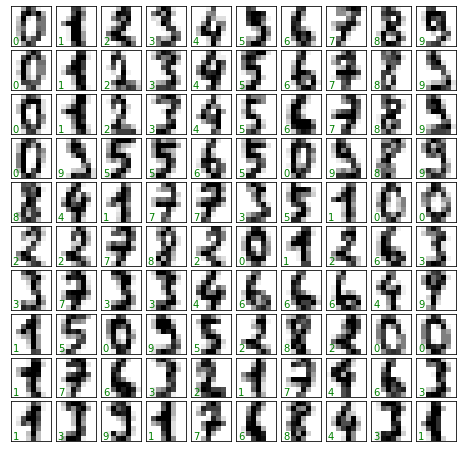

In [23]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

## Reducing the data to 2 dimension

In [26]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

## Plotting the 2d data

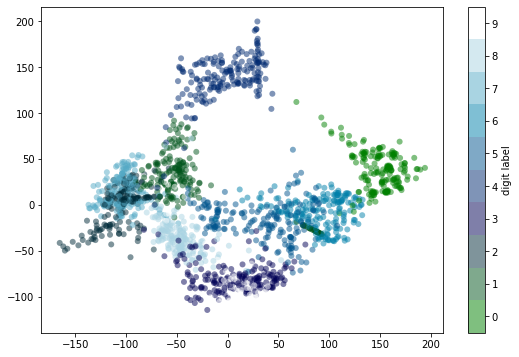

In [29]:
plt.figure(figsize=(9,6))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('ocean', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

### Splitting the test and train data

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

## Applying Naive Bayes

In [31]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

## Accuracy and Confusion Matrix

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

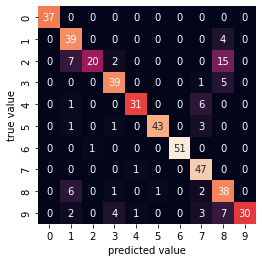

In [33]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('True value');

## Plotting the predicted result over data.images

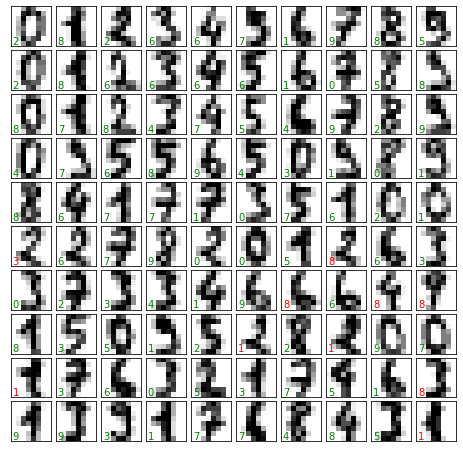

In [34]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')